In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
evp_data = pd.read_csv('evp_data.csv')

evp_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10


In [3]:
evp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257635 entries, 0 to 257634
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         257635 non-null  object 
 1   County                                             257627 non-null  object 
 2   City                                               257627 non-null  object 
 3   State                                              257635 non-null  object 
 4   Postal Code                                        257627 non-null  float64
 5   Model Year                                         257635 non-null  int64  
 6   Make                                               257635 non-null  object 
 7   Model                                              257635 non-null  object 
 8   Electric Vehicle Type                              257635 non-null  object

In [4]:
evp_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,257627.000000,257635.000000,257632.000000,257632.000000,257038.000000,2.576350e+05,2.576270e+05
mean,98177.614217,2021.713164,43.127775,705.270541,28.897151,2.404009e+08,5.297530e+10
std,2535.922185,3.023857,81.632805,6997.364357,14.882168,6.602927e+07,1.597188e+09
min,1469.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.134322e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.586345e+08,5.303303e+10
75%,98380.000000,2024.000000,35.000000,0.000000,42.000000,2.738272e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [5]:
# Checking for missing data

evp_data.isna().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 597
DOL Vehicle ID                                         0
Vehicle Location                                      16
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [6]:
# Removing missing values less than 5% of the total values

threshold = len(evp_data) * 0.05

print(threshold)

12881.75


In [7]:
cols_to_drop = evp_data.columns[evp_data.isna().sum() <= threshold]

print(cols_to_drop)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [8]:
evp_data.dropna(subset=cols_to_drop, inplace=True)

evp_data.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
print(evp_data.select_dtypes(include='object').nunique())

VIN (1-10)                                           15503
County                                                  39
City                                                   486
State                                                    1
Make                                                    46
Model                                                  179
Electric Vehicle Type                                    2
Clean Alternative Fuel Vehicle (CAFV) Eligibility        3
Vehicle Location                                       566
Electric Utility                                        75
dtype: int64


In [10]:
evp_data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            204660
Plug-in Hybrid Electric Vehicle (PHEV)     52367
Name: count, dtype: int64

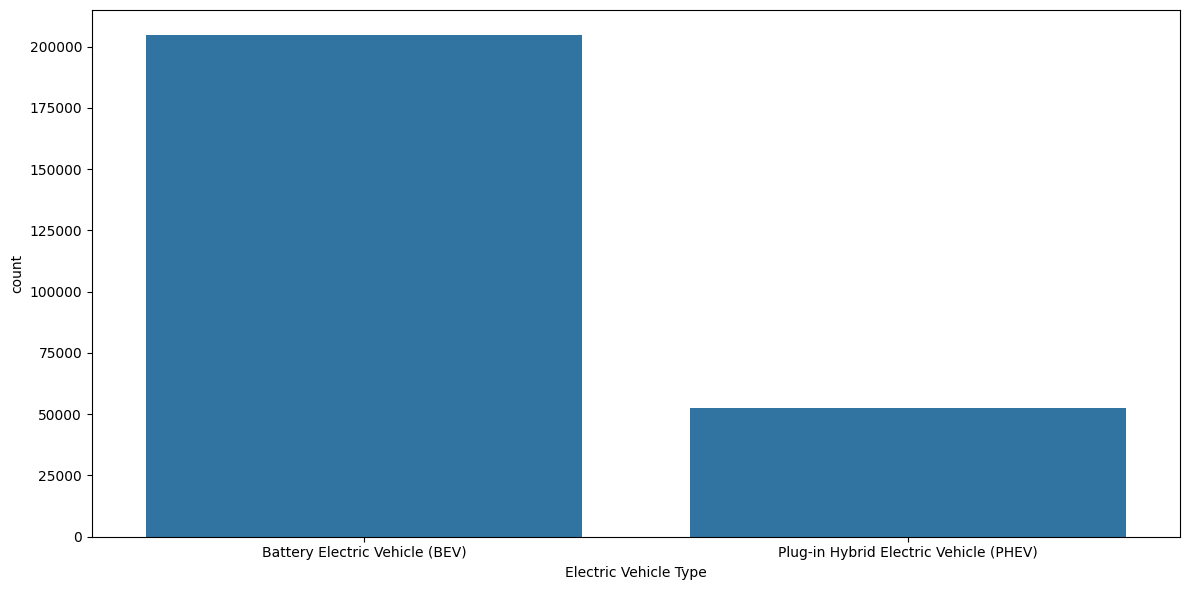

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data, x='Electric Vehicle Type')

plt.tight_layout()
plt.show()

In [12]:
evp_data = evp_data.drop(columns= ["VIN (1-10)", "State"])

In [13]:
evp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257027 entries, 0 to 257634
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             257027 non-null  object 
 1   City                                               257027 non-null  object 
 2   Postal Code                                        257027 non-null  float64
 3   Model Year                                         257027 non-null  int64  
 4   Make                                               257027 non-null  object 
 5   Model                                              257027 non-null  object 
 6   Electric Vehicle Type                              257027 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  257027 non-null  object 
 8   Electric Range                                     257027 non-null  float64
 9 

In [14]:
print(evp_data.select_dtypes(include='object').nunique())

County                                                39
City                                                 486
Make                                                  46
Model                                                179
Electric Vehicle Type                                  2
Clean Alternative Fuel Vehicle (CAFV) Eligibility      3
Vehicle Location                                     566
Electric Utility                                      75
dtype: int64


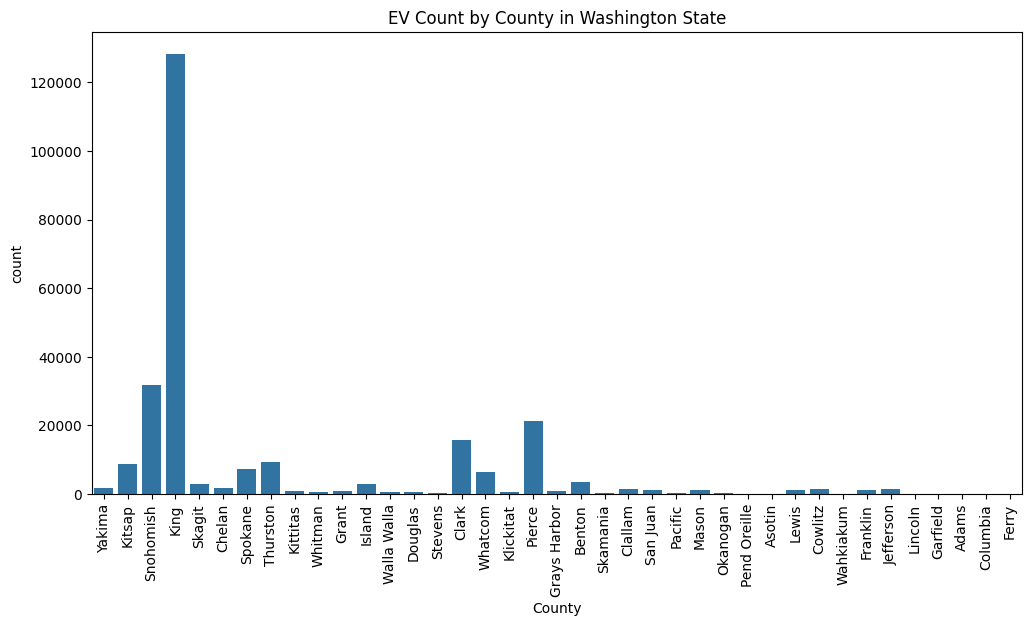

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data, x='County')

plt.xticks(rotation=90)
plt.title("EV Count by County in Washington State")
plt.tight_layout
plt.show()

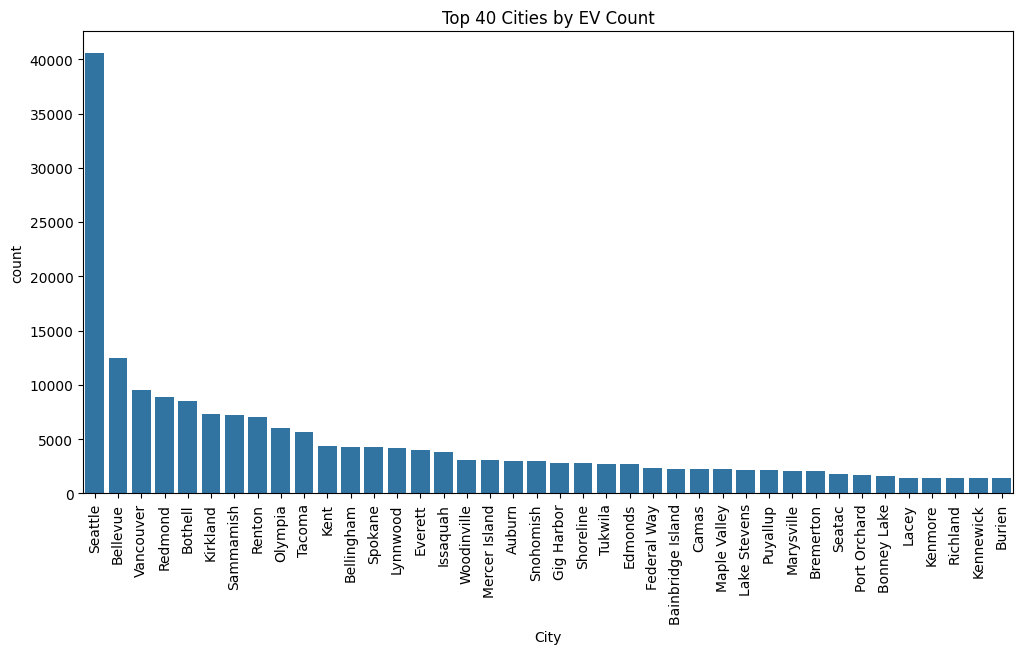

In [16]:
top_cities = evp_data["City"].value_counts().nlargest(40).index

plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data[evp_data["City"].isin(top_cities)], x="City", order=top_cities)

plt.xticks(rotation=90)
plt.title("Top 40 Cities by EV Count")
plt.show()

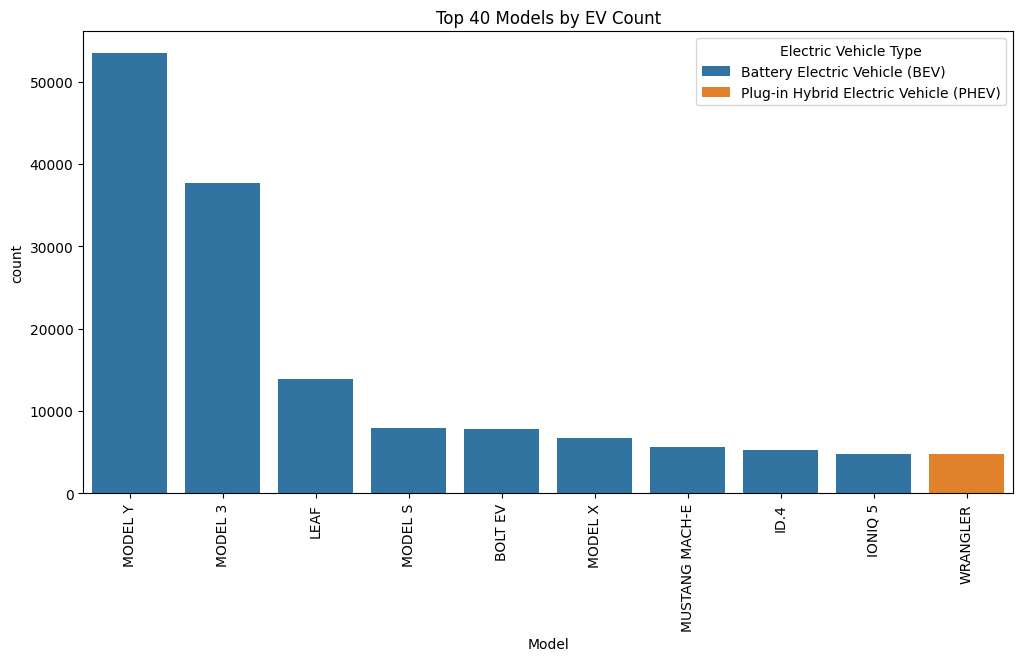

In [21]:
top_model = evp_data["Model"].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data[evp_data["Model"].isin(top_model)], x="Model", hue= "Electric Vehicle Type", order=top_model)

plt.xticks(rotation=90)
plt.title("Top 40 Models by EV Count")
plt.show()

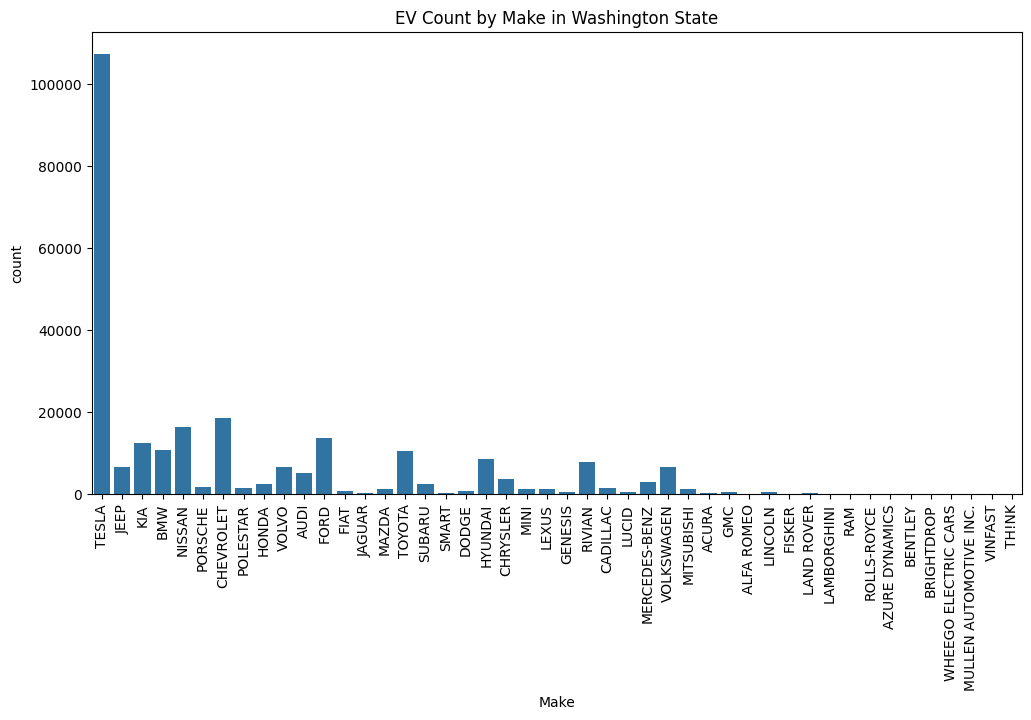

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data, x='Make')

plt.xticks(rotation=90)
plt.title("EV Count by Make in Washington State")
plt.tight_layout
plt.show()

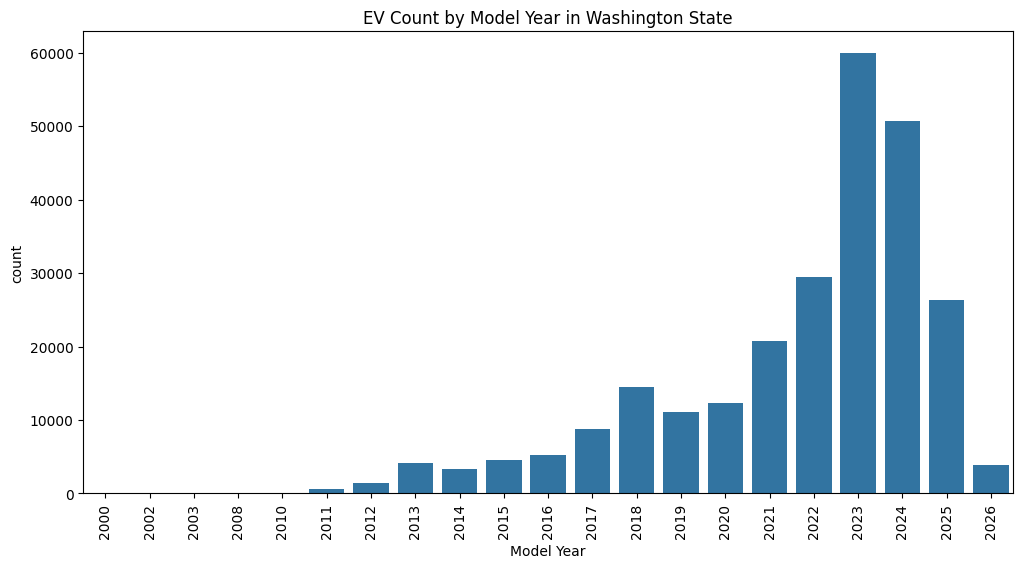

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=evp_data, x='Model Year')

plt.xticks(rotation=90)
plt.title("EV Count by Model Year in Washington State")
plt.tight_layout
plt.show()

In [20]:
evp_data["Model Year"].value_counts()

Model Year
2023    59891
2024    50728
2022    29413
2025    26369
2021    20789
2018    14507
2020    12310
2019    11030
2017     8751
2016     5257
2015     4585
2013     4087
2026     3866
2014     3313
2012     1442
2011      637
2010       22
2008       20
2000        8
2003        1
2002        1
Name: count, dtype: int64